In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv(".\数据集\TrainingData.csv", header=0)
##删除类别变量缺失值所在行
A=df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]
df.dropna(axis=0,subset = A.index,inplace = True)
##修改数值型变量Personal_info5的结果
df.loc[df['Personal_info5'].notnull(),'Personal_info5']=1
df.loc[:,'Personal_info5'].fillna(0,inplace=True)
##删除数值型4个变量-1所在行
cond=(df.Coverage_info1!=-1)&(df.Property_info5!=-1)&(df.Geographic_info1!=-1)&(df.Geographic_info2!=-1)
df1=df[cond]
##删除数值型变量Geographic_info3列
df1.drop('Geographic_info3', axis = 1, inplace = True)
##修改数值型变量Personal_info2中-1的值为0
df1.loc[df1['Personal_info2']==-1,'Personal_info2']=0
##删除类别变量缺失值所在行
A=df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]
df.dropna(axis=0,subset = A.index,inplace = True)
##修改数值型变量Personal_info5的结果
df.loc[df['Personal_info5'].notnull(),'Personal_info5']=1
df.loc[:,'Personal_info5'].fillna(0,inplace=True)
##删除数值型4个变量-1所在行
cond=(df.Coverage_info1!=-1)&(df.Property_info5!=-1)&(df.Geographic_info1!=-1)&(df.Geographic_info2!=-1)
df1=df[cond]
##删除数值型变量Geographic_info3列
df1.drop('Geographic_info3', axis = 1, inplace = True)
##修改数值型变量Personal_info2中-1的值为0
df1.loc[df1['Personal_info2']==-1,'Personal_info2']=0

C:\Users\17630\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\17630\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [3]:
#变量预测变量Y分离，同时去除不进入模型的变量
Y=df1['Quote_Flag']
Quote_Id=df1['Quote_Id']
Quote_Date=df1['Quote_Date']
dfx=df1.drop(['Quote_Flag','Quote_Id','Quote_Date'], axis = 1)
#数值型变量与类别型变量分离
dfnum=dfx.select_dtypes(include=['int64','float']).copy()
dfcate=dfx.select_dtypes(include=['object']).copy()

In [4]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfnum,Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

chi2得分: [1.18652182e+00 8.42220711e+02 6.42542164e+01 1.15280968e+02
 1.24639511e+03 1.58023943e+03 4.02695857e+03 2.70862611e+01
 8.86209304e+01 0.00000000e+00            nan 1.68327376e+02
 1.02097062e+03 1.04877181e+04 6.00505977e+02]
chi2得分P值: [2.76032270e-001 3.57115959e-185 1.09357657e-015 6.83011992e-027
 5.04086018e-273 0.00000000e+000 0.00000000e+000 1.94575895e-007
 4.78202565e-021 1.00000000e+000             nan 1.71591002e-038
 4.96656031e-224 0.00000000e+000 1.29940680e-132]


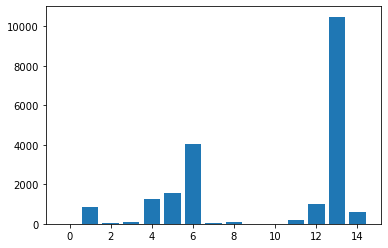

In [5]:
#变量选择：相关性度量的方法
from sklearn.feature_selection import SelectKBest,chi2
# 实例化selectKBest对象
skb=SelectKBest(chi2,k=10).fit(X_train, y_train)
#调用属性scores_，获得chi2返回的得分
print('chi2得分:',skb.scores_)
# 调用属性pvalues_ ，获得chi2返回的P值
print('chi2得分P值:',skb.pvalues_)   
#返回特征过滤后保留下的特征列索引
skb.get_support(indices=True) 
# 转换数据，得到特征过滤后保留下的特征数据集
x_new=skb.transform(X_train)
plt.bar(range(len(skb.scores_)), skb.scores_)
plt.show()

In [6]:
#变量选择：决策树度量的方法
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
#显示模型重要性
print(model.feature_importances_)

[0.06754409 0.10917124 0.03254928 0.01566683 0.14813055 0.06416533
 0.13153016 0.167008   0.00123955 0.         0.         0.0152894
 0.11128184 0.04965994 0.08676379]


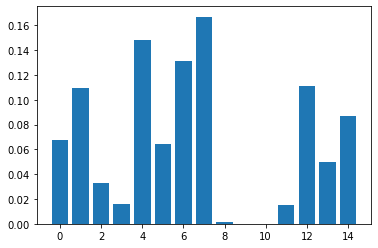

In [7]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [8]:
X=dfnum.iloc[:,[1,4,5,6,12,13,14]]
X_train, X_test, y_train, y_test = train_test_split(X,Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: score:0.669762 (precision:0.326585,recall:0.684152)
KNN: score:0.772815 (precision:0.270307,recall:0.110491)
GB: score:0.813107 (precision:0.535467,recall:0.172712)
ABC: score:0.812680 (precision:0.527653,recall:0.196987)
RF: score:0.813641 (precision:0.522908,recall:0.292969)


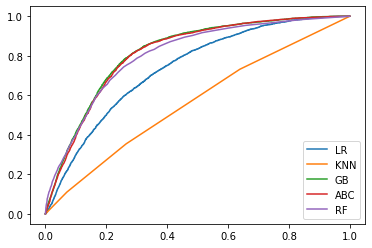

  names    scores  precisions   recalls       f1s      aucs
0    LR  0.669762    0.326585  0.684152  0.442120  0.675255
1   KNN  0.772815    0.270307  0.110491  0.156863  0.519974
2    GB  0.813107    0.535467  0.172712  0.261181  0.568638
3   ABC  0.812680    0.527653  0.196987  0.286875  0.577641
4    RF  0.813641    0.522908  0.292969  0.375536  0.614876


In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
##设置5折交叉验证
kfold = StratifiedKFold(n_splits=5)
##添加模型
models = []
models.append(('LR', LogisticRegression(C=1e10, class_weight = 'balanced')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GB', GradientBoostingClassifier(random_state = 42)))
models.append(('ABC', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(class_weight = 'balanced')))
names = []
aucs=[]
scores=[]
precisions=[]
recalls=[]
f1s=[]
for name, model in models:    
    model.fit(X_train, y_train)
    Y_pred_test = model.predict(X_test)
    score=model.score(X_test,y_test)
    scores.append(score)
    precision=precision_score(y_test,Y_pred_test)
    precisions.append(precision)
    recall=recall_score(y_test,Y_pred_test)
    recalls.append(recall)
    f1=f1_score(y_test,Y_pred_test)
    f1s.append(f1)
    fpr, tpr, thresholds= roc_curve(y_test,model.predict_proba(X_test)[:,1])
    auc = roc_auc_score(y_test,model.predict(X_test))
    aucs.append(auc)
    plt.plot(fpr, tpr, label=name)
    names.append(name)
    msg = "%s: score:%f (precision:%f,recall:%f)" % (name, score, precision, recall)
    print(msg)
plt.legend(loc='lower right')
plt.show()
c={"names":names,"scores":scores,"precisions":precisions,"recalls":recalls,"f1s":f1s,"aucs":aucs}
result=pd.DataFrame(c)
print(result)

In [10]:
#支持向量机网格调参
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = {"kernel":('linear','rbf'),
              'C':[0.1,0.25]}
searchmodel = GridSearchCV(SVC(max_iter=1000),param_grid =parameters)
searchmodel.fit(X,Y)
print(searchmodel.best_score_)
print(searchmodel.best_estimator_.C)
print(searchmodel.best_estimator_.kernel)
means = searchmodel.cv_results_['mean_test_score']
params = searchmodel.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler

0.4951176310279937
0.1
linear
0.495118  with:   {'C': 0.1, 'kernel': 'linear'}
0.443195  with:   {'C': 0.1, 'kernel': 'rbf'}
0.443480  with:   {'C': 0.25, 'kernel': 'linear'}
0.465435  with:   {'C': 0.25, 'kernel': 'rbf'}


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [11]:
#随机森林网格调参
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 5]}]
forest_reg = RandomForestClassifier()
searchmodel = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='accuracy')
searchmodel.fit(X_train, y_train)
print(searchmodel.best_score_)
means = searchmodel.cv_results_['mean_test_score']
params = searchmodel.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

0.810818847209515
0.787351  with:   {'max_features': 2, 'n_estimators': 3}
0.806885  with:   {'max_features': 2, 'n_estimators': 10}
0.810361  with:   {'max_features': 2, 'n_estimators': 30}
0.786985  with:   {'max_features': 3, 'n_estimators': 3}
0.806885  with:   {'max_features': 3, 'n_estimators': 10}
0.810682  with:   {'max_features': 3, 'n_estimators': 30}
0.785110  with:   {'max_features': 4, 'n_estimators': 3}
0.808715  with:   {'max_features': 4, 'n_estimators': 10}
0.808943  with:   {'max_features': 4, 'n_estimators': 30}
0.784241  with:   {'max_features': 5, 'n_estimators': 3}
0.805215  with:   {'max_features': 5, 'n_estimators': 10}
0.810819  with:   {'max_features': 5, 'n_estimators': 30}


In [12]:
#集成逻辑回归，支持向量机，随机森林三个模型
#训练三个模型
#LogisticRegression算法
LR = LogisticRegression(C=1e10, class_weight = 'balanced')
LR.fit(X_train,y_train)
#支持向量机模型
from sklearn.svm import SVC
SVC=SVC(C=0.25,kernel='rbf',max_iter=1000)
SVC.fit(X_train,y_train)
#随机森林
RF = RandomForestClassifier(n_estimators=10,max_features=2)
RF.fit(X_train,y_train)
#集成三个模型结果
Y_pred1= LR.predict(X_test)
Y_pred2=SVC.predict(X_test)
Y_pred3=RF.predict(X_test)
c={"LR":Y_pred1,"SVC":Y_pred2,"RF":Y_pred3}
pred=pd.DataFrame(c)
pred.head()

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,LR,SVC,RF
0,1,1,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [13]:
from sklearn.metrics import confusion_matrix
pred_z=(pred.sum(axis=1)>1)
#计算混淆函数
confusion_matrix(y_test,pred_z)

array([[11861,  3293],
       [ 1707,  1877]], dtype=int64)

In [14]:
#计算精准率
precision_score(y_test,Y_pred_test)

0.5229083665338645

In [15]:
#计算召回率
recall_score(y_test,Y_pred_test)

0.29296875

In [16]:
#类别型变量处理one-hot编码
Xcate=pd.get_dummies(dfcate)
Xcate.head()

,Field_info1_A,Field_info1_B,Field_info1_C,Field_info1_D,Field_info1_E,Field_info1_F,Field_info1_J,Field_info1_K,"Field_info3_1,113","Field_info3_1,165",...,Property_info3_O,Property_info3_Q,Property_info3_R,Property_info3_S,Geographic_info4_N,Geographic_info4_Y,Geographic_info5_CA,Geographic_info5_IL,Geographic_info5_NJ,Geographic_info5_TX
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
